In [2]:
import pandas as pd
import numpy as np

file1 = pd.read_csv('data/msn_02_fuel_leak_signals_preprocessed.csv', sep=';')
file2 = pd.read_csv('data/msn_10_fuel_leak_signals_preprocessed.csv', sep=';')
file3 = pd.read_csv('data/msn_11_fuel_leak_signals_preprocessed.csv', sep=';')
file4 = pd.read_csv('data/msn_12_fuel_leak_signals_preprocessed.csv', sep=';')
file5 = pd.read_csv('data/msn_14_fuel_leak_signals_preprocessed.csv', sep=';')
file6 = pd.read_csv('data/msn_29_fuel_leak_signals_preprocessed.csv', sep=';')
file7 = pd.read_csv('data/msn_37_fuel_leak_signals_preprocessed.csv', sep=';')
file8 = pd.read_csv('data/msn_53_fuel_leak_signals_preprocessed.csv', sep=';')

# Combining Files to anayse phase 8 of all datasets

In [3]:
#combine all files into one file
combined = pd.concat([file2, file3, file4, file5, file6, file7, file8])

### Creating new variables

In [4]:
#create new column called total_fuel_used which is FUEL_USED_1 + FUEL_USED_2 + FUEL_USED_3 + FUEL_USED_4
combined['total_fuel_used'] = combined['FUEL_USED_1'] + combined['FUEL_USED_2'] + combined['FUEL_USED_3'] + combined['FUEL_USED_4']

combined['Fuel_On_board_tanks'] = combined['VALUE_FUEL_QTY_CT'] + combined['VALUE_FUEL_QTY_FT1'] + combined['VALUE_FUEL_QTY_FT2'] + combined['VALUE_FUEL_QTY_FT3'] + combined['VALUE_FUEL_QTY_FT4'] + combined['VALUE_FUEL_QTY_LXT'] + combined['VALUE_FUEL_QTY_RXT']

#plot (FOB - total_fuel_used) and Fuel_On_board_tanks for each flight
combined['FOB - total_fuel_used'] = combined['VALUE_FOB'] - combined['total_fuel_used']

#calculate 2 columns called fuel_used_per_minute_FOB and fuel_used_per_minute_total_fuel_used
combined['fuel_used_per_minute_FOB_diff'] = combined['VALUE_FOB'].diff()
combined['fuel_used_per_minute_total_fuel_used_diff'] = combined['total_fuel_used'].diff()

combined['cummalitive_fuel_used'] = combined['total_fuel_used'].cumsum()

combined['initial_FOB'] = combined.groupby('Flight')['VALUE_FOB'].transform('first')

combined['initial_FOB_calculated'] = combined.groupby('Flight')['Fuel_On_board_tanks'].transform('first')

combined['fuel_used+FOB'] = combined['total_fuel_used'] + combined['VALUE_FOB']

combined['diff_initial_FOB_fuel_used+FOB'] = combined['initial_FOB'] - combined['fuel_used+FOB']


In [5]:
#new column that is the difference between intial_FOB and initial_FOB_calculated
combined['diff_initial_FOB'] = combined['initial_FOB'] - combined['initial_FOB_calculated']


In [6]:
combined['alititude_diff'] = combined['FW_GEO_ALTITUDE'].diff()

### Ananlysing the different flight phases

In [7]:
#calculating the average diff_initial_FOB_fuel_used+FOB for each flight phase
combined.groupby('FLIGHT_PHASE_COUNT')['diff_initial_FOB_fuel_used+FOB'].mean()

FLIGHT_PHASE_COUNT
0.0             NaN
1.0    -9291.121009
2.0    -3554.741042
3.0    -2057.494284
4.0    -5946.365684
5.0    -6670.974382
6.0    -7042.420333
7.0     -460.393888
8.0    -5378.306024
9.0      352.397597
10.0    3834.214977
11.0       2.894514
12.0   -4072.540053
Name: diff_initial_FOB_fuel_used+FOB, dtype: float64

In [8]:
combined.groupby('FLIGHT_PHASE_COUNT')['alititude_diff'].mean()

FLIGHT_PHASE_COUNT
0.0      0.600000
1.0     -6.397111
2.0     -0.013850
3.0      0.406052
4.0     -1.047671
5.0     -1.945717
6.0     31.230309
7.0     20.096136
8.0     -0.071837
9.0     -9.083145
10.0     0.840596
11.0     0.072165
12.0    -0.511470
Name: alititude_diff, dtype: float64

### Keeping only flight phase 8 now

In [9]:
#keeping only the data of FLIGHT_PHASE_COUNT = 8
combined = combined[combined['FLIGHT_PHASE_COUNT'] == 8]

In [10]:
combined.isna().sum()

UTC_TIME                                            0
FUEL_USED_2                                  17920515
FUEL_USED_3                                  17920923
FUEL_USED_4                                  17920047
FW_GEO_ALTITUDE                                     0
VALUE_FOB                                           0
VALUE_FUEL_QTY_CT                                   0
VALUE_FUEL_QTY_FT1                                  0
VALUE_FUEL_QTY_FT2                                  0
VALUE_FUEL_QTY_FT3                                  0
VALUE_FUEL_QTY_FT4                                  0
VALUE_FUEL_QTY_LXT                                  0
VALUE_FUEL_QTY_RXT                                  0
FLIGHT_PHASE_COUNT                                  0
FUEL_USED_1                                  17919763
Flight                                              0
MSN                                                 0
total_fuel_used                              17921703
Fuel_On_board_tanks         

### Dropping NA values

In [11]:
combined.dropna(inplace=True)

In [12]:
combined.isna().sum()

UTC_TIME                                     0
FUEL_USED_2                                  0
FUEL_USED_3                                  0
FUEL_USED_4                                  0
FW_GEO_ALTITUDE                              0
VALUE_FOB                                    0
VALUE_FUEL_QTY_CT                            0
VALUE_FUEL_QTY_FT1                           0
VALUE_FUEL_QTY_FT2                           0
VALUE_FUEL_QTY_FT3                           0
VALUE_FUEL_QTY_FT4                           0
VALUE_FUEL_QTY_LXT                           0
VALUE_FUEL_QTY_RXT                           0
FLIGHT_PHASE_COUNT                           0
FUEL_USED_1                                  0
Flight                                       0
MSN                                          0
total_fuel_used                              0
Fuel_On_board_tanks                          0
FOB - total_fuel_used                        0
fuel_used_per_minute_FOB_diff                0
fuel_used_per

In [13]:
combined.shape

(374827, 29)

In [14]:
combined['Flight'].nunique()

479

### Now analysing the different flights phase 8 values

In [15]:
#calculating the average diff_initial_FOB_fuel_used+FOB for each flight phase
combined.groupby('Flight')['diff_initial_FOB_fuel_used+FOB'].mean()

Flight
0.0       10147.962017
5.0       14840.537344
9.0        2815.034410
11.0      10167.945158
12.0     -10803.306125
              ...     
2213.0      134.716615
2214.0      151.199990
2216.0       89.552267
2221.0      432.708778
2223.0      278.200254
Name: diff_initial_FOB_fuel_used+FOB, Length: 479, dtype: float64

In [16]:
average_values = combined.groupby('Flight')['diff_initial_FOB_fuel_used+FOB'].mean()
for flight, avg in average_values.items():
    print(f"Flight: {flight}, Average: {avg}")

Flight: 0.0, Average: 10147.962017093012
Flight: 5.0, Average: 14840.537343812059
Flight: 9.0, Average: 2815.0344100344996
Flight: 11.0, Average: 10167.945157821878
Flight: 12.0, Average: -10803.306124720077
Flight: 15.0, Average: -25146.35729335161
Flight: 16.0, Average: 2966.427532567933
Flight: 17.0, Average: -9283.585294954077
Flight: 18.0, Average: 18476.367042710866
Flight: 19.0, Average: 4541.16636737645
Flight: 20.0, Average: 11128.047708136448
Flight: 21.0, Average: -4287.077530073422
Flight: 22.0, Average: -11956.374322120162
Flight: 23.0, Average: -8138.077697753403
Flight: 24.0, Average: -8089.287312481005
Flight: 26.0, Average: 2543.8176622459355
Flight: 28.0, Average: -5450.7947478851365
Flight: 29.0, Average: -373.673591382424
Flight: 35.0, Average: -9040.17722290034
Flight: 37.0, Average: -4309.154805068429
Flight: 38.0, Average: 9768.988897717789
Flight: 39.0, Average: 19742.423166009277
Flight: 40.0, Average: -9850.208952603274
Flight: 41.0, Average: -4672.78844770674

In [17]:
combined['Flight'].nunique()


479

In [18]:
combined['diff_initial_FOB_fuel_used+FOB'].mean()

-5380.402703586223

### Focusing on VALUE FOB now

### Graphing VALUE FOB

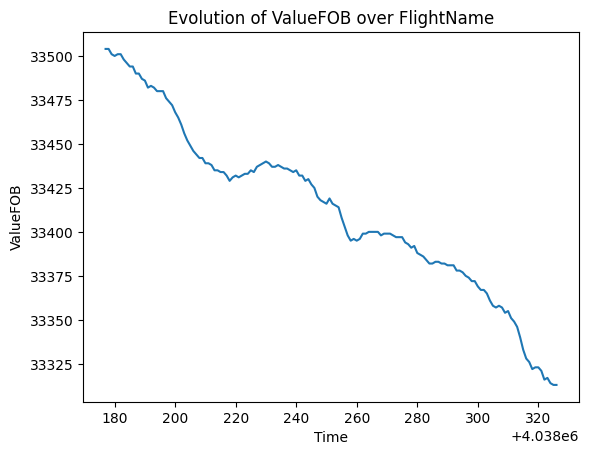

In [21]:
import matplotlib.pyplot as plt

# Replace 'FlightName' with the name of your flight
flight_data = combined[combined['Flight'] == 2216.0]

plt.plot(flight_data['VALUE_FOB'])
plt.title('Evolution of ValueFOB over FlightName')
plt.xlabel('Time')
plt.ylabel('ValueFOB')
plt.show()

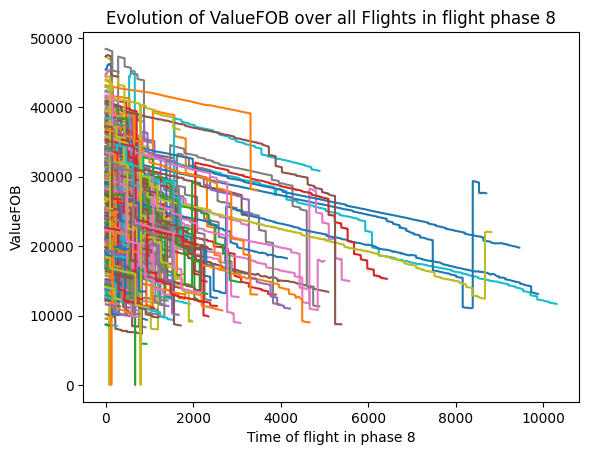

In [22]:
grouped = combined.groupby('Flight')

for name, group in grouped:
    plt.plot(group['VALUE_FOB'].values)

plt.title('Evolution of ValueFOB over all Flights in flight phase 8')
plt.xlabel('Time of flight in phase 8')
plt.ylabel('ValueFOB')
plt.show()

### Calculating graident of the curve maybe there is something with this

In [23]:
def calculate_gradient(group):
    if len(group) > 1:
        return np.gradient(group)
    else:
        return np.zeros_like(group)

combined['Gradient_VALUE_FOB'] = combined.groupby('Flight')['VALUE_FOB'].transform(calculate_gradient)

In [24]:
combined['Gradient_VALUE_FOB'].mean()

-6.8400835585483435

In [25]:
#removing the large outliers of Gradient_VALUE_FOB by clamping the values
combined['Gradient_VALUE_FOB_clamped'] = combined['Gradient_VALUE_FOB'].clip(lower=-0.1, upper=0.1)

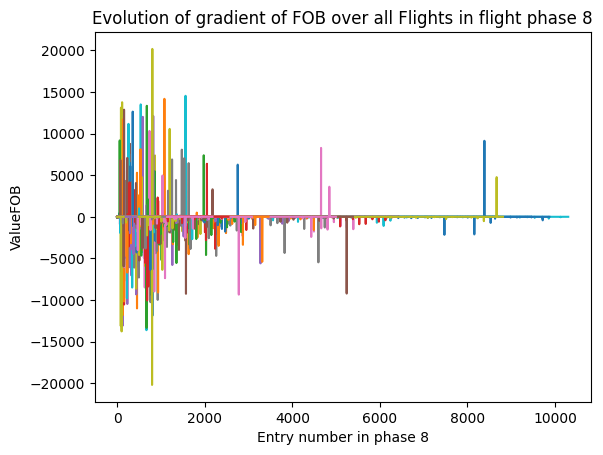

In [31]:
grouped = combined.groupby('Flight')

for name, group in grouped:
    plt.plot([i for i, _ in enumerate(group['Gradient_VALUE_FOB'])], group['Gradient_VALUE_FOB'].values)

plt.title('Evolution of gradient of FOB over all Flights in flight phase 8')
plt.xlabel('Entry number in phase 8')
plt.ylabel('ValueFOB')
plt.show()

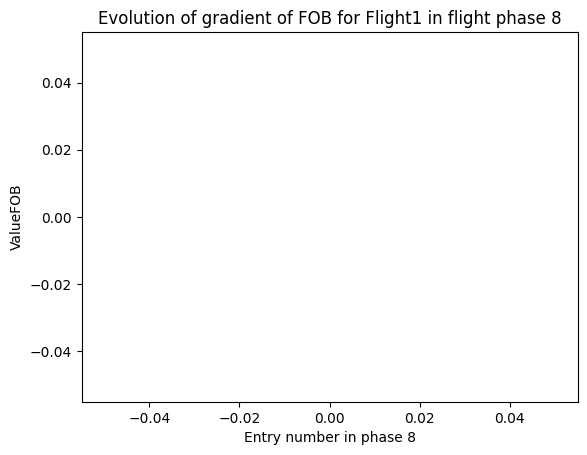

In [27]:
# Filter data for a specific flight
flight_data = combined[combined['Flight'] == 'Flight1']  # Replace 'Flight1' with the actual flight number

# Plot the gradient
plt.plot([i for i, _ in enumerate(flight_data['Gradient_VALUE_FOB'])], flight_data['Gradient_VALUE_FOB_clamped'].values)

plt.title('Evolution of gradient of FOB for Flight1 in flight phase 8')  # Replace 'Flight1' with the actual flight number
plt.xlabel('Entry number in phase 8')
plt.ylabel('ValueFOB')
plt.show()

In [30]:
combined.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,...,fuel_used_per_minute_total_fuel_used_diff,cummalitive_fuel_used,initial_FOB,initial_FOB_calculated,fuel_used+FOB,diff_initial_FOB_fuel_used+FOB,diff_initial_FOB,alititude_diff,Gradient_VALUE_FOB,Gradient_VALUE_FOB_clamped
1489633,2015-07-21 03:51:31,2454.501465,2444.412842,2481.687988,336.0,30967.0,0.0,1918.0,2620.0,2604.0,...,0.000000,1.182816e+09,30964.0,30965.0,40793.431152,-9829.431152,-1.0,0.0,0.0,0.0
2802286,2016-10-29 08:30:12,79.764977,73.332397,71.396461,1840.0,24325.0,0.0,1819.0,2505.0,2439.0,...,0.492310,1.769479e+09,24976.0,24978.0,24628.052589,347.947411,-2.0,55.0,-14.0,-0.1
2802287,2016-10-29 08:30:13,79.862244,73.441658,71.505798,1890.0,24311.0,0.0,1821.0,2508.0,2436.0,...,0.423836,1.769480e+09,24976.0,24978.0,24614.476425,361.523575,-2.0,50.0,-15.5,-0.1
2802288,2016-10-29 08:30:14,79.986839,73.550957,71.629326,1935.0,24294.0,0.0,1821.0,2510.0,2432.0,...,0.478958,1.769480e+09,24976.0,24978.0,24597.955383,378.044617,-2.0,45.0,-18.0,-0.1
2802289,2016-10-29 08:30:15,80.097038,73.659943,71.753143,1972.0,24275.0,0.0,1820.0,2509.0,2429.0,...,0.464821,1.769480e+09,24976.0,24978.0,24579.420204,396.579796,-2.0,37.0,-21.0,-0.1
